In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Functions

In [3]:
# prediction functions

def simple_moving_average(n: int, df: pd.DataFrame) -> pd.DataFrame:
    last_year = df["Year"].max()
    new_df = df.tail(n)

    for i in range(1, 6):
        mean_electricity = new_df["Electricity (Million kilowatt-hour)"].tail(n).mean()
        new_row = {"Year": last_year + i, "Electricity (Million kilowatt-hour)": mean_electricity}
        new_df.loc[len(new_df)] = new_row

    return new_df.tail(5).reset_index(drop=True)


def weighted_moving_average(n: int, weights: list, df: pd.DataFrame) -> pd.DataFrame:
    last_year = df["Year"].max()
    new_df = df.tail(n)
    for i in range(1, 6):
        weighted_mean = np.average(a=new_df["Electricity (Million kilowatt-hour)"].tail(n), weights=weights)
        new_row = {"Year": last_year + i, "Electricity (Million kilowatt-hour)": weighted_mean}
        new_df.loc[len(new_df)] = new_row

    return new_df.tail(5).reset_index(drop=True)


# Error functions   

def error(real_data: pd.DataFrame, predicted_data: pd.DataFrame) -> pd.DataFrame:
    error_df = pd.DataFrame({"year": real_data["Year"], "actual": real_data["Electricity (Million kilowatt-hour)"],
                             "predicted": predicted_data["Electricity (Million kilowatt-hour)"]})
    error_df["error"] = error_df["actual"] - error_df["predicted"]
    return error_df


def mean_absolute_deviation(Error: pd.DataFrame) -> float:
    deviation = Error["error"].abs().mean()
    return deviation

### Data

In [5]:
data = pd.read_csv("Data.csv")
data

,Year,Electricity (Million kilowatt-hour)
0,1344,816
1,1345,1062
2,1346,1409
3,1347,1924
4,1348,2562
5,1349,3418
6,1350,4519
7,1351,5723
8,1352,7796
9,1353,9152


In [6]:
Real_data = pd.read_csv("Real.csv")
Real_data

,Year,Electricity (Million kilowatt-hour)
0,1397,259723
1,1398,273750
2,1399,287378
3,1400,312000
4,1401,316632


### Simple  Moving Average  With 3 Years

Mean Square Error for simple moving average with 3 years is 2565802462.2449074
Mean Absolute Error for simple moving average with 3 years is 46189.03292181072


C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_14568\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_14568\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_14568\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

,year,actual,predicted,error
0,1397,259723,239924.666667,19798.333333
1,1398,273750,244128.888889,29621.111111
2,1399,287378,246359.851852,41018.148148
3,1400,312000,243471.135802,68528.864198
4,1401,316632,244653.292181,71978.707819


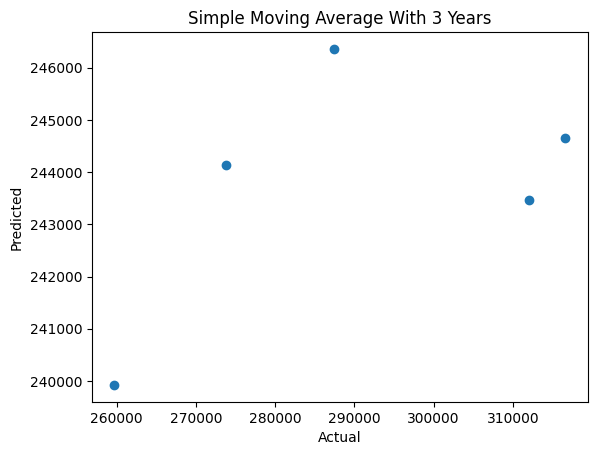

In [9]:
n = 3
simple = simple_moving_average(n, data)
simple_df = error(Real_data, simple)
m = mean_squared_error(simple_df["actual"], simple_df["predicted"],squared=True)
deviation = mean_absolute_deviation(simple_df)
print(f"Mean Square Error for simple moving average with {n} years is {m}")
print(f"Mean Absolute Error for simple moving average with {n} years is {deviation}")
#plot:)
plt.scatter(simple_df["actual"], simple_df["predicted"])
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.title(f"Simple Moving Average With {n} Years")
simple_df

### Simple Moving Average With 5 Years

Mean Square Error for simple moving average with 5 years is 3353717166.0619383
Mean Absolute Error for simple moving average with 5 years is 54900.443199999994


C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_14568\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_14568\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_14568\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

,year,actual,predicted,error
0,1397,259723,228503.000,31220.000
1,1398,273750,233586.000,40164.000
2,1399,287378,236372.600,51005.400
3,1400,312000,238184.720,73815.280
4,1401,316632,238334.464,78297.536


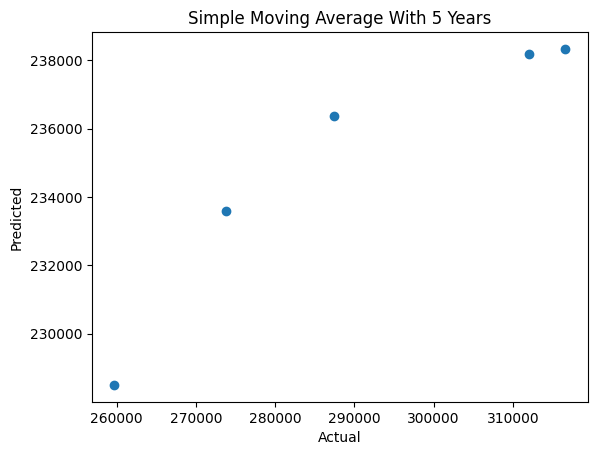

In [12]:
n = 5
simple = simple_moving_average(n, data)
simple_df = error(Real_data, simple)
m = mean_squared_error(simple_df["actual"],simple_df["predicted"],squared=True)
deviation = mean_absolute_deviation(simple_df)
print(f"Mean Square Error for simple moving average with {n} years is {m}")
print(f"Mean Absolute Error for simple moving average with {n} years is {deviation}")
#plot:)
plt.scatter(simple_df["actual"], simple_df["predicted"])
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.title(f"Simple Moving Average With {n} Years")
simple_df

### Simple Moving Average With 9 Years 

Mean Square Error for simple moving average with 9 years is 5821338815.283793
Mean Absolute Error for simple moving average with 9 years is 74375.52640010839


C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_14568\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_14568\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_14568\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

,year,actual,predicted,error
0,1397,259723,208131.444444,51591.555556
1,1398,273750,212542.493827,61207.506173
2,1399,287378,215693.659808,71684.340192
3,1400,312000,219225.733120,92774.266880
4,1401,316632,222012.036800,94619.963200


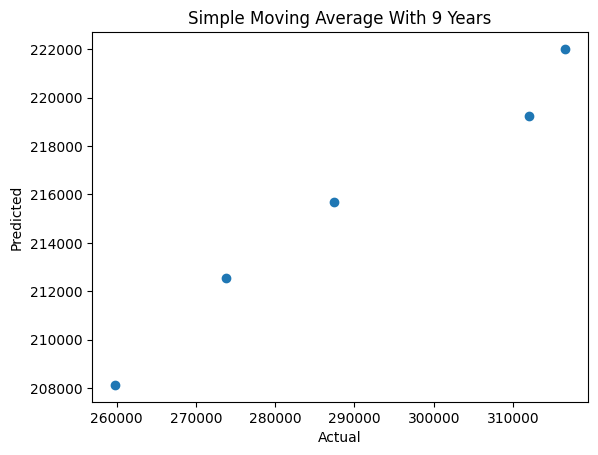

In [13]:
n=9
simple= simple_moving_average(n, data)
simple_df = error(Real_data, simple)
m=mean_squared_error(simple_df["actual"],simple_df["predicted"],squared=True)
deviation=mean_absolute_deviation(simple_df)
print(f"Mean Square Error for simple moving average with {n} years is {m}")
print(f"Mean Absolute Error for simple moving average with {n} years is {deviation}")
#plot:)
plt.scatter(simple_df["actual"],simple_df["predicted"])
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.title(f"Simple Moving Average With {n} Years")
simple_df

### Weighted Moving Average for 3 Years

Mean Square Error for weighted moving average with 3 years is 2756804791.164381
Mean Absolute Error for weighted moving average with 3 years is 48296.81176285138


C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_14568\1253688696.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_14568\1253688696.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_14568\1253688696.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

,year,actual,predicted,error
0,1397,259723,235364.300000,24358.700000
1,1398,273750,242888.511000,30861.489000
2,1399,287378,246474.265870,40903.734130
3,1400,312000,239735.983828,72264.016172
4,1401,316632,243535.880488,73096.119512


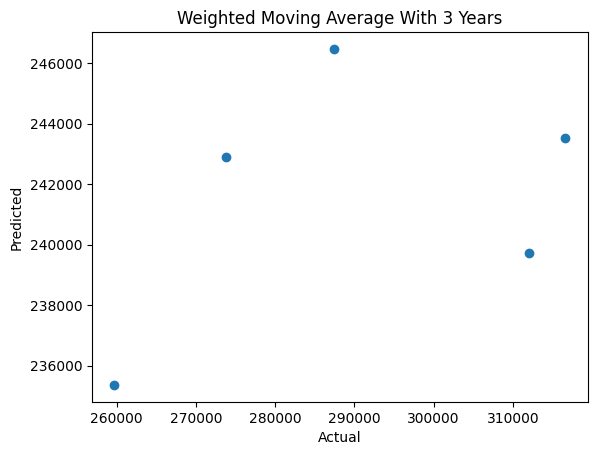

In [14]:
n=3
weights=[0.5, 0.33, 0.17]
weighted = weighted_moving_average(n=n,weights=weights,df=data)

weighted_df = error(Real_data, weighted)
m=mean_squared_error(weighted_df["actual"],weighted_df["predicted"],squared=True)
deviation=mean_absolute_deviation(weighted_df)
print(f"Mean Square Error for weighted moving average with {n} years is {m}")
print(f"Mean Absolute Error for weighted moving average with {n} years is {deviation}")
#plot:)
plt.scatter(weighted_df["actual"],weighted_df["predicted"])
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.title(f"Weighted Moving Average With {n} Years")
weighted_df

In [15]:
mean_square_error=[2-565-802-462,3-353-717-166,5-821-338-815]
weighted=2-756-804-791
absolute_error=[246-189,54-900,74-375]
weight_absolute=48296